In [1]:
from pipeline_tools import *

from astropy.table import Table
from matplotlib import pyplot as plt

## Before you Run

Make sure that you have your training and validation data ready, preferably in the data folder. For training, you do not need the whole DES footprint, just a random selection of the data. There is a script to do just this, in `SOM-photoz-BFD/data/get_short_data.py`. Here is a summary of how to use this file:
```
get_short_data.py [-h] [--cat_len CAT_LEN] input_file output_file type

get a short version of the large fits data file

positional arguments:
  input_file            data file to sample from
  output_file           name of output file
  type                  waht you will use this data for (usually TRAIN or VALIDATION)

optional arguments:
  -h, --help            show this help message and exit
  --cat_len CAT_LEN, -cl CAT_LEN
```

In [2]:
data_path = '../data/wide_field_data/TRAIN_CAT_1E+05.fits'
t = Table.read(data_path, format='fits')

# Checking to Ensure that the Data is Valid

/global/homes/d/dncross/SOMs/SOM-photoz-BFD/src/pipeline_tools.py:6: RuntimeWarning: divide by zero encountered in log10
  return -2.5 * np.log10(f) + const
/global/homes/d/dncross/SOMs/SOM-photoz-BFD/src/pipeline_tools.py:6: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(f) + const


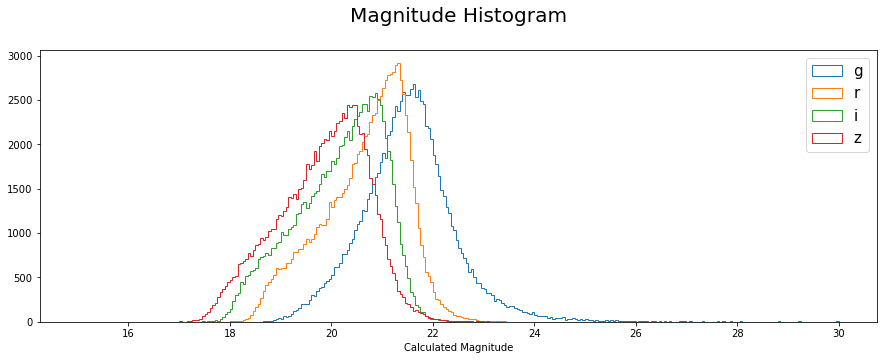

In [3]:
fluxes = np.array([t['Mf_%s'%s] for s in ['g', 'r', 'i', 'z']]).T
fluxes_cov = np.array([t['cov_Mf_%s'%s] for s in ['g', 'r', 'i', 'z']]).T
fluxes_err = np.sqrt(fluxes_cov)
mag = flux_to_mag(fluxes)

r = (15,30) ; labels = ['g', 'r', 'i', 'z']
[plt.hist(mag[:,i], 300, range=r, histtype='step', label=l) for i, l in enumerate(labels)]

plt.legend(fontsize=15)
plt.title("Magnitude Histogram\n", fontsize=20)
plt.xlabel('Calculated Magnitude')
plt.gcf().set_size_inches((15,5))
plt.show()

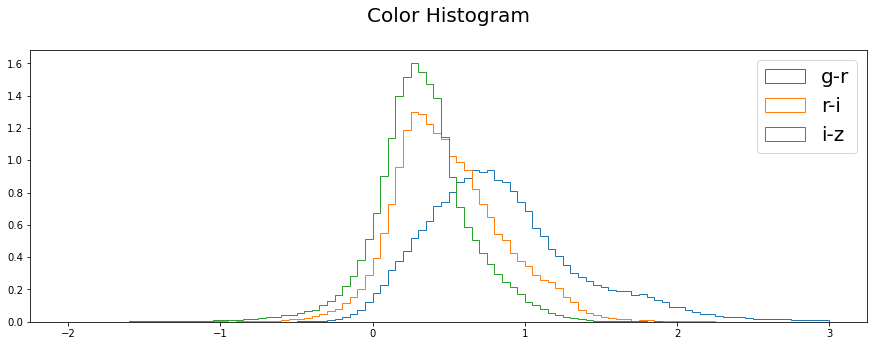

In [4]:
r = (-2, 3) ; labels = ['g-r', 'r-i', 'i-z']
for i, l in enumerate(labels):
    diff = flux_to_mag(fluxes[:,i]) - flux_to_mag(fluxes[:,i+1])
    plt.hist(diff, 100, range=r, histtype='step', label=l, density=True)

plt.legend(fontsize=20)
plt.title("Color Histogram\n", fontsize=20)
plt.gcf().set_size_inches((15,5))
plt.show()

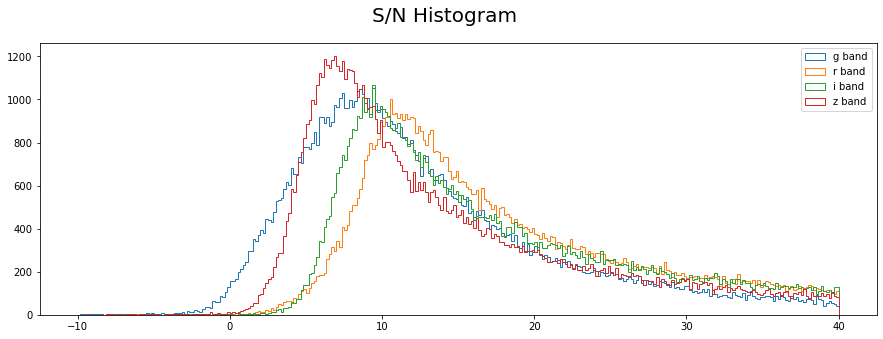

In [5]:
SN = fluxes/fluxes_err

r=(-10,40) ; labels = ['g band', 'r band', 'i band', 'z band']
for i, l in enumerate(labels):
    h = plt.hist(SN[:,i], 300, range=r, histtype='step', label=l)
    
plt.suptitle("S/N Histogram\n", fontsize=20)
plt.legend()
plt.gcf().set_size_inches((15,5))
plt.show()

## Footprint Coverage

In [6]:
def conv(deg):
    if deg < 180:
        return -deg
    else:
        return 360 - deg%360 

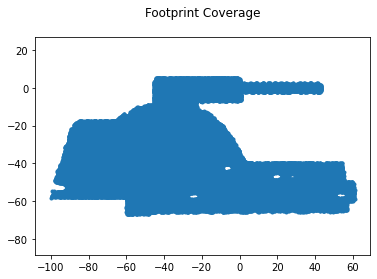

In [7]:
plt.title('Footprint Coverage\n')
plt.scatter([conv(ra) for ra in t['ra']], t['dec'], marker='.')
plt.axis('equal')
plt.show()